In [129]:
import tarfile
import os
from math import *
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt


### Extraction

In [130]:

# path to the tar.gz file
tar_path = 'pythia8311_xsec.tar.gz'
extract_path = './extracted_files'

# extract the tar.gz file
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

# path to /xsec_dat in extracted files directory
xsec_dat_path = os.path.join(extract_path, 'xsec_dat')


In [131]:

# get a list of all filenames from /xsec_dat 
file_list = [os.path.join(xsec_dat_path, f) for f in os.listdir(xsec_dat_path) if os.path.isfile(os.path.join(xsec_dat_path, f))]

In [132]:

# read each file into a pandas df
dataframes = {}
for file in file_list:
    try:
        # no header in the files
        df = pd.read_csv(file, delimiter='\t', header=None)
        # store df with filenames
        dataframes[file] = df
    except pd.errors.EmptyDataError:
        print(f"Skipping file with no columns to parse: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")


Files from Maximilian Reininghaus for hadronic interaction model datasets: Sibyll 2.3d, EPOS-LHC, QGSJet-II.04 and Pythia 8.3.07.

In [133]:
xsec_max_path = './xsec_max_files'

xs_p_O_sib = loadtxt(f"{xsec_max_path}/xs_p_O_sib23d.dat", unpack=True)
xs_p_O_epos = loadtxt(f"{xsec_max_path}/xs_p_O_EPOS-LHC.dat", unpack=True)
xs_p_O_qgs = loadtxt(f"{xsec_max_path}/xs_p_O_qgsII04.dat", unpack=True)
xs_p_O_py8307 = loadtxt(f"{xsec_max_path}/xs_p_O_Pythia8307.dat", unpack=True)

xs_pip_O_sib = loadtxt(f"{xsec_max_path}/xs_pi_O_sib23d.dat", unpack=True)
xs_pip_O_qgs = loadtxt(f"{xsec_max_path}/xs_pi_O_qgsII04.dat", unpack=True)
xs_pip_O_epos = loadtxt(f"{xsec_max_path}/xs_pi_O_EPOS-LHC.dat", unpack=True)
xs_pip_O_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_O_Pythia8307.dat", unpack=True)

Exported datasets from Pythia 8.3.10 from jupyter notebook `pythi8310/Pythia8.3.10_cross_section_tables.ipynb`:

In [134]:
xs_p_O_py8310 = [326.561, 357.313, 397.736, 438.032, 484.021, 538.804, 612.224, 694.637, 796.673, 914.109]
xs_p_O_py8310_err = [0.208, 0.276, 0.340, 0.372, 0.340, 0.302, 0.028, 0.289, 0.282, 0.283]
xs_pip_O_py8310 = [261.857, 288.653, 331.384, 383.752, 426.441, 494.747, 555.011, 690.725, 810.340, 737.710]
xs_pip_O_py8310_err = [0.026, 0.010, 0.015, 0.028, 0.025, 0.030, 1.968, 1.841, 1.948, 1.247]
elab_py8310 = [1e+11, 1e+12, 1e+13, 1e+14, 1e+15, 1e+16, 1e+17, 1e+18, 1e+19, 1e+20]

### Selection

Filter out only filenames matching `main1010_p_16O*.dat` and `main1010_pip_16O*.dat` for simulations using oxygen-16 as a target, and `main1010_p_1H*.dat` and `main1010_pip_1H*.dat` for simulations using a proton as a target.

In [135]:
p_O_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_p_16O" in file}
pip_O_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_pip_16O" in file}
p_p_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_p_1H" in file}
pip_p_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_pip_1H" in file}

In [136]:
p_O_dataframes = []

for file, df in p_O_filtered_dataframes.items():
    # extract rows labeled sig_inel, err_inel and elab
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_O_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_O_dataframes.append(p_O_dataframe)
p_O_dataframe = pd.concat(p_O_dataframes, ignore_index=True)
p_O_dataframe = p_O_dataframe.sort_values(by='elab')


In [137]:
pip_O_dataframes = []

for file, df in pip_O_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_O_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_O_dataframes.append(pip_O_dataframe)
pip_O_dataframe = pd.concat(pip_O_dataframes, ignore_index=True)
pip_O_dataframe = pip_O_dataframe.sort_values(by='elab')


In [138]:
p_p_dataframes = []

for file, df in p_p_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_p_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_p_dataframes.append(p_p_dataframe)
p_p_dataframe = pd.concat(p_p_dataframes, ignore_index=True)
p_p_dataframe = p_p_dataframe.sort_values(by='elab')


In [139]:
pip_p_dataframes = []

for file, df in pip_p_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_p_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_p_dataframes.append(pip_p_dataframe)
pip_p_dataframe = pd.concat(pip_p_dataframes, ignore_index=True)
pip_p_dataframe = pip_p_dataframe.sort_values(by='elab')


### Plotting

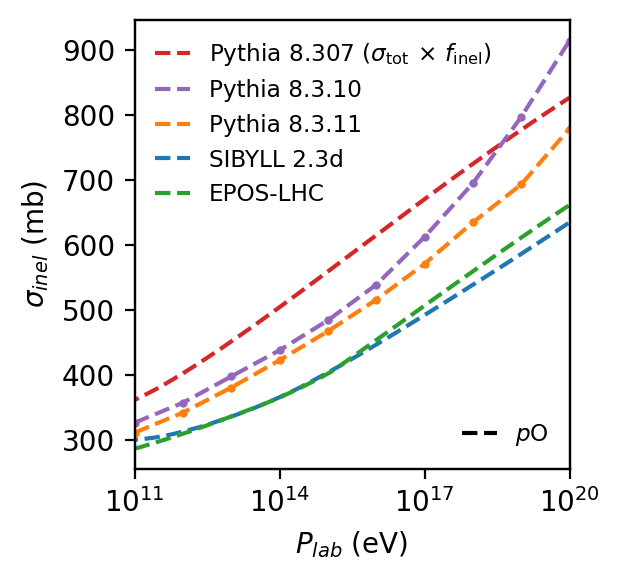

In [140]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_p_O_py8307[0,:], xs_p_O_py8307[1,:] * 0.9, "--", color="C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
ax.errorbar(elab_py8310, xs_p_O_py8310, yerr=xs_p_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], ls='--', color="tab:purple", label="Pythia 8.3.10")
ax.errorbar(p_O_dataframe['elab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], ls='--', color="tab:orange", label="Pythia 8.3.11")
ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "--", color="C0", label="SIBYLL 2.3d")
ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "--", color="C2", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "--", color="black", label="$p$O")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pO.png", dpi=400)

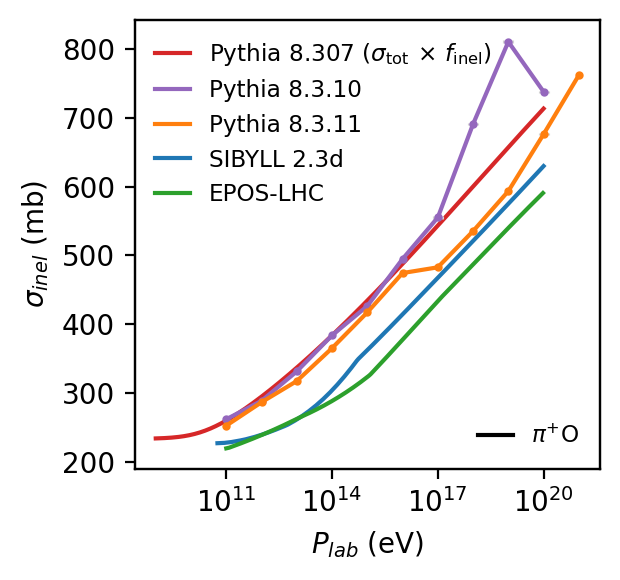

In [142]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
#ax.set(xlim=(1e11,1e20), ylim=(200,900))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_pip_O_py8307[0,:], xs_pip_O_py8307[1,:] * 0.92, "-C3", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
ax.errorbar(elab_py8310, xs_pip_O_py8310, yerr=xs_pip_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], "-", color="tab:purple", label="Pythia 8.3.10")
ax.errorbar(pip_O_dataframe['elab']*1e9, pip_O_dataframe['sig_inel'], yerr=pip_O_dataframe['err_inel'], c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:orange", label="Pythia 8.3.11")
ax.plot(xs_pip_O_sib[0,:], xs_pip_O_sib[1,:], "-", label="SIBYLL 2.3d")
ax.plot(xs_pip_O_epos[0,:], xs_pip_O_epos[1,:], "-C2", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label=r"$\pi^{+}$O")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_piO.png", dpi=400)